In [88]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [89]:
import pandas as pd
telcom = pd.read_csv (r"C:\Users\Sai\Desktop\python\Machine Learning\Random forest\churn.csv")

In [90]:
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [91]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
#replace values
telcom.SeniorCitizen =telcom.SeniorCitizen.replace({1:"Yes",0:"No"})

In [93]:
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] =telcom["TotalCharges"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [94]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 2.2. Data Manipulation

In [95]:
telcom.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [96]:
telcom.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [97]:
telcom.OnlineSecurity=telcom.OnlineSecurity.replace({'No internet service' : 'No'})
telcom.OnlineBackup=telcom.OnlineBackup.replace({'No internet service' : 'No'})
telcom.DeviceProtection=telcom.DeviceProtection.replace({'No internet service' : 'No'})
telcom.TechSupport=telcom.TechSupport.replace({'No internet service' : 'No'})
telcom.StreamingTV=telcom.StreamingTV.replace({'No internet service' : 'No'})
telcom.StreamingMovies=telcom.StreamingMovies.replace({'No internet service' : 'No'})
telcom.MultipleLines=telcom.MultipleLines.replace({'No phone service' : 'No'})

In [98]:
telcom.OnlineBackup.value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [99]:
#Tenure to categorical column
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_13-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_25-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_49-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),axis = 1)

In [100]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_25-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,Tenure_25-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


telcom=telcom=telcom.drop('tenure',axis=1)

# 3. Missing Value Identify & Treatment

In [101]:
# count the number of NaN values in each column
print(telcom.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
tenure_group         0
dtype: int64


In [102]:
telcom.TotalCharges.fillna(telcom.TotalCharges.mean(),inplace=True) # one column at a time bb

In [103]:
# count the number of NaN values in each column
print(telcom.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64


# 4.Outlier identify & Treatment 

In [104]:
telcom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

<AxesSubplot:ylabel='TotalCharges'>

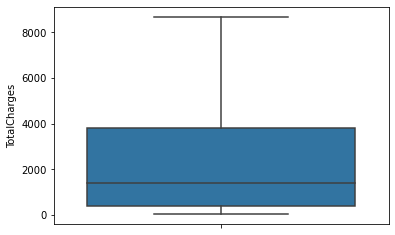

In [105]:
sns.boxplot(y=telcom.TotalCharges)  # Single Variable

<AxesSubplot:ylabel='MonthlyCharges'>

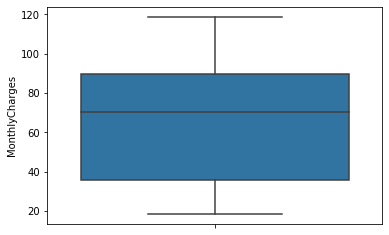

In [106]:
sns.boxplot(y=telcom.MonthlyCharges)  # Single Variable

<AxesSubplot:ylabel='tenure'>

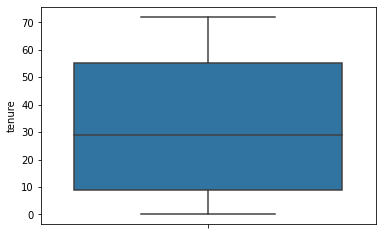

In [107]:
sns.boxplot(y=telcom.tenure)  # Single Variable

# Data Visualization

In [108]:
import plotly.express as px

fig = px.pie(telcom,names='Churn',color='Churn',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 5.Labeling the data
we need to convert category to number

In [109]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_25-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,Tenure_25-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [110]:
telcom=telcom.drop('customerID',axis=1)

In [111]:
# #Employee Numeric columns
telcom_num = telcom[telcom.select_dtypes(include=[np.number]).columns.tolist()]
telcom_num.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [112]:
telcom_dummies = telcom[telcom.select_dtypes(include=['object']).columns.tolist()]
telcom_dummies.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,Tenure_0-12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,Tenure_25-48
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Tenure_0-12


In [113]:
from sklearn.preprocessing import LabelEncoder
telcom_dummies=telcom_dummies.apply(LabelEncoder().fit_transform)
telcom_dummies.head(3)
# label in ascending order

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0,2
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1,0


In [114]:
telcom = pd.concat([telcom_num, telcom_dummies],axis=1)

# Data Partition 

In [115]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = telcom.drop('Churn', axis = 1)
Y = telcom[['Churn']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=15, # make 15 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=15)

# Importance Features

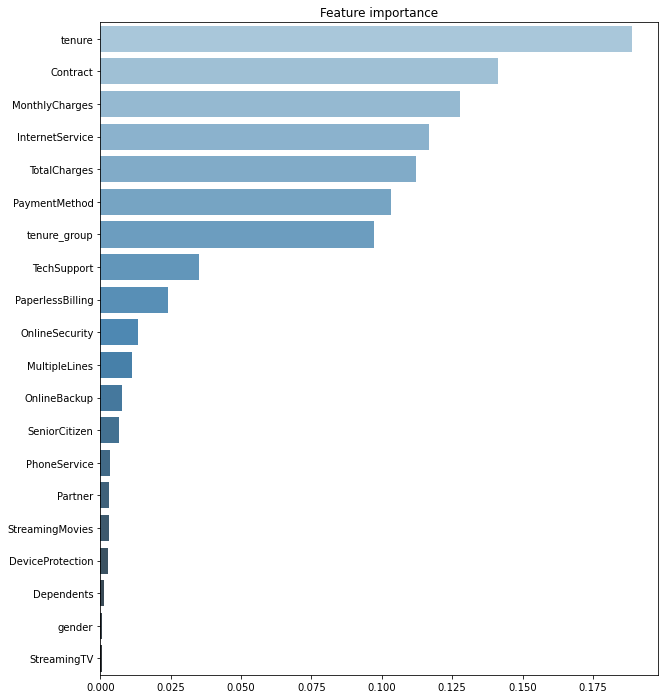

In [117]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')


# Random Forest Visualization

In [118]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

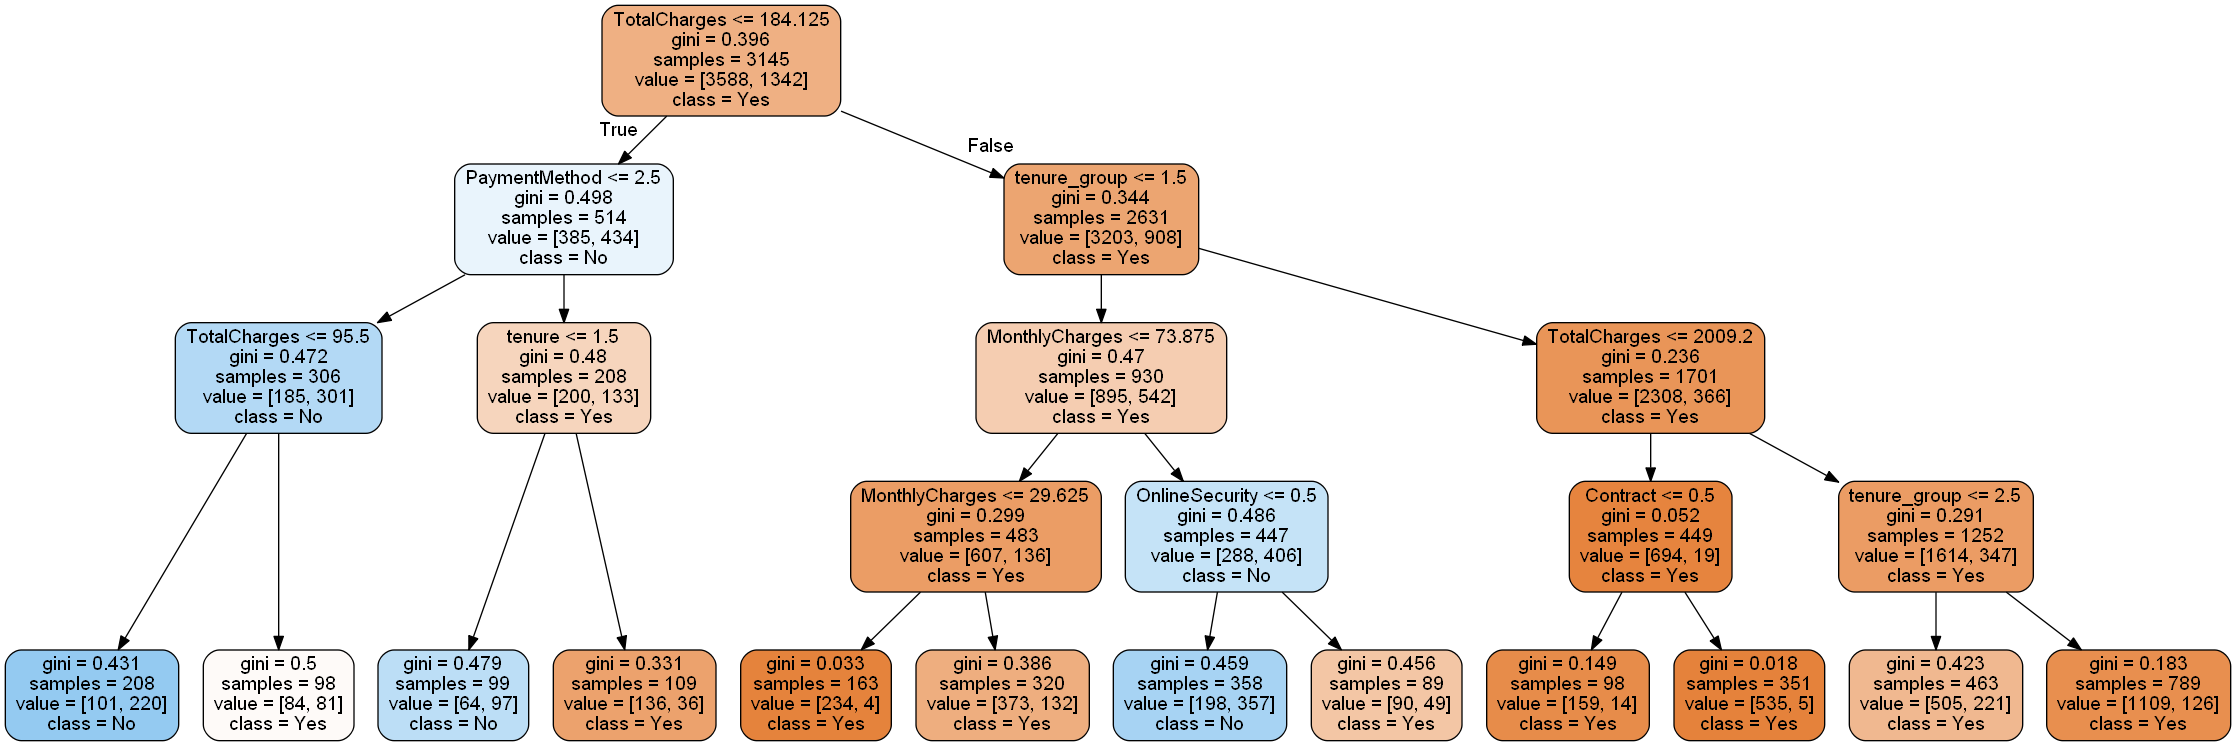

In [119]:
tree = Model.estimators_[14]  # specify the tree number 
Churn=['Yes','No'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'tree.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Churn,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [120]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,Churn
3101,58,79.80,4526.85,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,3,0
5142,66,104.55,6779.05,0,0,0,0,1,1,1,...,1,1,1,1,0,1,1,0,4,0
5937,8,84.00,613.40,0,1,1,0,1,1,1,...,0,0,0,0,1,0,1,2,0,1
4110,70,67.95,4664.15,1,0,1,0,1,0,0,...,1,0,1,0,1,2,0,3,4,0
3574,1,20.35,20.35,0,0,0,0,1,0,2,...,0,0,0,0,0,0,1,3,0,0


In [121]:
train['Predicted']=Model.predict(X_train)
train.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,Churn,Predicted
3101,58,79.80,4526.85,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,3,0,0
5142,66,104.55,6779.05,0,0,0,0,1,1,1,...,1,1,1,0,1,1,0,4,0,0
5937,8,84.00,613.40,0,1,1,0,1,1,1,...,0,0,0,1,0,1,2,0,1,1
4110,70,67.95,4664.15,1,0,1,0,1,0,0,...,0,1,0,1,2,0,3,4,0,0
3574,1,20.35,20.35,0,0,0,0,1,0,2,...,0,0,0,0,0,1,3,0,0,0


# Step 7 : Model Performance Metrics

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Churn'], train['Predicted'])
print(confusion_matrix)

[[3412  199]
 [ 780  539]]


In [123]:
Accuracy_Train=((3432+498)/(4930)*100)
print(Accuracy_Train)

79.71602434077079


In [124]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3611
           1       0.73      0.41      0.52      1319

    accuracy                           0.80      4930
   macro avg       0.77      0.68      0.70      4930
weighted avg       0.79      0.80      0.78      4930



# Step 8 : Predictions on Test Dataset

In [125]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,Churn
6692,41,74.65,3090.65,0,0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,2,0
2624,17,66.70,1077.05,1,0,1,1,1,1,0,...,1,1,1,0,0,0,1,3,1,0
1076,58,24.50,1497.90,0,0,1,1,1,1,2,...,0,0,0,0,0,1,1,1,3,0
1428,1,50.45,50.45,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,2,0,1
7026,9,44.20,403.35,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [126]:
test['Predicted']=Model.predict(X_test)
test.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure_group,Churn,Predicted
6692,41,74.65,3090.65,0,0,0,0,1,1,0,...,1,1,0,1,0,1,0,2,0,0
2624,17,66.70,1077.05,1,0,1,1,1,1,0,...,1,1,0,0,0,1,3,1,0,0
1076,58,24.50,1497.90,0,0,1,1,1,1,2,...,0,0,0,0,1,1,1,3,0,0
1428,1,50.45,50.45,1,0,0,0,1,1,0,...,0,0,0,0,0,1,2,0,1,1
7026,9,44.20,403.35,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


# Step 9 : Model Performance Metrics on Test data 

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Churn'], test['Predicted'])
print(confusion_matrix)

[[1469   94]
 [ 338  212]]


In [128]:
Accuracy_test=((1471+191)/(2113)*100)
Accuracy_test

78.65593942262187

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test['Predicted']))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1563
           1       0.69      0.39      0.50       550

    accuracy                           0.80      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.78      0.80      0.77      2113



# Finish